In [12]:
#Imports
import numpy as np
import pandas as pd
import geopandas as gpd
import difflib
import matplotlib.pyplot as plt
import time


# ***Observed Data***

In [13]:
AC_feb_apr2020 = pd.read_excel('/Users/cpoliziani/Downloads/Transit Rich/ObsRidershipAC/AC2020_Feb_Apr.xlsx')
AC_may2021 = pd.read_excel('/Users/cpoliziani/Downloads/Transit Rich/ObsRidershipAC/AC2021_May 20211227.xlsx')
AC_mar_apr_may2023 = pd.read_excel('/Users/cpoliziani/Downloads/Transit Rich/ObsRidershipAC/AC2023_March_April_May.xlsx')



In [26]:
dfs = [AC_feb_apr2020, AC_may2021, AC_mar_apr_may2023]

for df in dfs:
    
    
    print("--------------------------------------------------")
    
    df = df[(df['ROUTE']==1)|(df['ROUTE']=='1T')]
    
    print(len(df))
    
    print("Sum of ONS (SUM):", df['ON'].sum(skipna=True))
    print("AV ofONS (SUM):", df['ON'].sum(skipna=True)/len(df.DATE.value_counts().keys()))
    print("Used values:", len(df['ON']) - df['ON'].isna().sum())
    print("Discarded values:", df['ON'].isna().sum())

    
    print("--------------------------------------------------")


--------------------------------------------------
7429
Sum of ONS (SUM): 253990
AV ofONS (SUM): 4304.9152542372885
Used values: 7429
Discarded values: 0
--------------------------------------------------
--------------------------------------------------
5517
Sum of ONS (SUM): 198870
AV ofONS (SUM): 6415.1612903225805
Used values: 5517
Discarded values: 0
--------------------------------------------------
--------------------------------------------------
11514
Sum of ONS (SUM): 694053
AV ofONS (SUM): 7886.965909090909
Used values: 11514
Discarded values: 0
--------------------------------------------------


In [19]:
AC_feb_apr2020

,DAYTYPE,ROUTE,BLOCK,TRIP START TIME,DIR,DATE,VEHNO,ON,OFF
0,SATURDAY,1,1002,00:19:00,0,2020-02-01,2236,11,11
1,SATURDAY,1,1004,00:49:00,0,2020-02-01,2243,17,17
2,SATURDAY,1,1003,01:49:00,0,2020-02-01,2238,21,21
3,SATURDAY,1,1002,02:19:00,0,2020-02-01,2236,13,13
4,SATURDAY,1,1004,02:49:00,0,2020-02-01,2243,25,25
...,...,...,...,...,...,...,...,...,...
171314,WEEKDAY,O,125002,17:00:00,WB,2020-04-30,2242,8,8
171315,WEEKDAY,O,125006,18:00:00,WB,2020-04-30,2244,9,9
171316,WEEKDAY,O,125002,19:00:00,WB,2020-04-30,2242,5,5
171317,WEEKDAY,O,125006,20:00:00,WB,2020-04-30,2244,11,11


2020-02-03    136
2020-02-04    146
2020-02-05    149
2020-02-06    131
2020-02-07    146
2020-02-10    118
2020-02-11    139
2020-02-12    132
2020-02-13    110
2020-02-14    110
2020-02-18    109
2020-02-19    149
2020-02-20    121
2020-02-21     84
2020-02-24     90
2020-02-25    108
2020-02-26    142
2020-02-27     77
2020-02-28    120
2020-04-01     90
2020-04-02    113
2020-04-03    165
2020-04-06     92
2020-04-07    102
2020-04-08     80
2020-04-09     58
2020-04-10     82
2020-04-13    134
2020-04-14    114
2020-04-15    144
2020-04-16     69
2020-04-17    103
2020-04-20     77
2020-04-21     72
2020-04-22    160
2020-04-23    133
2020-04-24    150
2020-04-27    170
2020-04-28    110
2020-04-29    137
2020-04-30    154
Name: DATE, dtype: int64
2021-05-03    181
2021-05-04    181
2021-05-05    172
2021-05-06    170
2021-05-07    199
2021-05-10    193
2021-05-11    198
2021-05-12    205
2021-05-13    180
2021-05-14    192
2021-05-17    185
2021-05-18    170
2021-05-19    193
202

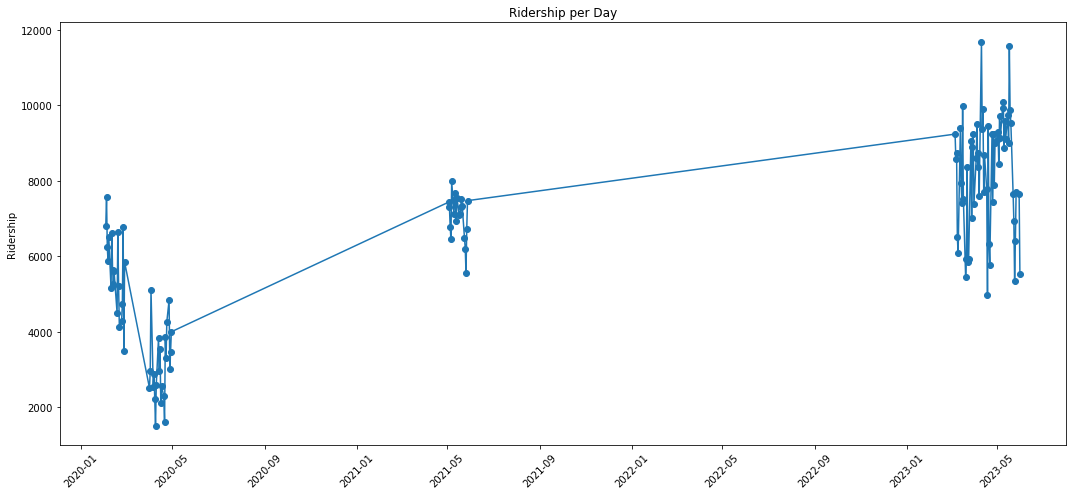

In [18]:
# Sample data
# dfs = [pd.DataFrame(...), pd.DataFrame(...)] # A list of dataframes

ridership_data = {}

for df in dfs:
    # Filter DataFrame based on the given conditions
    df = df[
        ((df['DAYTYPE']=='WEEKDAY') | (df['DAYTYPE']==1)) &
        ((df['ROUTE']==1) | (df['ROUTE']=='1T') | (df['ROUTE']=='1'))
    ]
    
    # Group by DATE and sum the ON column
    daily_ridership = df.groupby('DATE')['ON'].sum()
    
    for date, ridership in daily_ridership.items():
        # Accumulate ridership data
        try:
            ridership_data[date] += ridership_data.get(date, 0) + ridership
        except:
            ridership_data[date] = ridership_data.get(date, 0) + ridership
        
    print(df['DATE'].value_counts().sort_index())


# Sort by date and prepare for plotting
dates = sorted(ridership_data.keys())
riderships = [ridership_data[date] for date in dates]

# Plot
plt.figure(figsize=(15, 7))
plt.plot(dates, riderships, marker='o')
plt.xticks(rotation=45)
plt.ylabel("Ridership")
plt.title("Ridership per Day")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Assuming df is your DataFrame and DATE is a column with dates
print(df['DATE'].value_counts().sort_index(ascending=False))

# Print all dates and their counts
print(counts)

2023-05-31     81
2023-05-30    111
2023-05-26    108
2023-05-25     93
2023-05-24     70
2023-05-23    102
2023-05-22    112
2023-05-19    137
2023-05-18    147
2023-05-17    154
2023-05-16    122
2023-05-15    150
2023-05-12    136
2023-05-11    146
2023-05-10    138
2023-05-09    145
2023-05-08    146
2023-05-05    151
2023-05-04    146
2023-05-03    122
2023-05-02    135
2023-05-01    134
2023-04-28    132
2023-04-27    117
2023-04-26    137
2023-04-25    103
2023-04-24    130
2023-04-21     88
2023-04-20     89
2023-04-19    131
2023-04-18     80
2023-04-17    111
2023-04-14    127
2023-04-13    122
2023-04-12    145
2023-04-11    146
2023-04-10    173
2023-04-07    145
2023-04-06    143
2023-04-05    127
2023-04-04    156
2023-04-03    135
2023-03-31    101
2023-03-30    147
2023-03-29    184
2023-03-28    156
2023-03-27    147
2023-03-24     99
2023-03-23     97
2023-03-22    133
2023-03-21    125
2023-03-20     89
2023-03-17    109
2023-03-16    157
2023-03-15    121
2023-03-14

In [20]:
df.DATE.value_counts()

2023-03-29    184
2023-04-10    173
2023-03-14    159
2023-03-16    157
2023-04-04    156
2023-03-28    156
2023-05-17    154
2023-05-05    151
2023-05-15    150
2023-03-06    148
2023-05-18    147
2023-03-30    147
2023-03-27    147
2023-05-04    146
2023-05-08    146
2023-04-11    146
2023-05-11    146
2023-03-13    146
2023-04-07    145
2023-04-12    145
2023-05-09    145
2023-04-06    143
2023-03-07    139
2023-05-10    138
2023-04-26    137
2023-05-19    137
2023-05-12    136
2023-04-03    135
2023-05-02    135
2023-05-01    134
2023-03-22    133
2023-04-28    132
2023-04-19    131
2023-04-24    130
2023-03-08    128
2023-04-14    127
2023-04-05    127
2023-03-21    125
2023-05-16    122
2023-05-03    122
2023-04-13    122
2023-03-15    121
2023-03-09    118
2023-04-27    117
2023-05-22    112
2023-05-30    111
2023-04-17    111
2023-03-17    109
2023-05-26    108
2023-04-25    103
2023-05-23    102
2023-03-31    101
2023-03-24     99
2023-03-23     97
2023-03-10     96
2023-05-25

***Compare Ridership***

In [2]:
#Determine SUM of hourly load per direction per starting stop and hour
scale = 0.3
nrows = None
events_baseline = pd.read_csv('gs://beam-core-outputs/sfbay-baseline2018-30pct-20230825/beam/year-2018-iteration-4/ITERS/it.0/0.events.csv.gz',
                             usecols=['type','startX','startY','vehicle','time','numPassengers'], nrows = nrows)
# 'gs://beam-core-outputs/sfbay-baseline2018-30pct-20230710/beam/year-2018-iteration-10/ITERS/it.0/0.events.csv.gz':'Base18.10',\n",
#     "            # 'gs://beam-core-outputs/sfbay-tr-30pct-20230716/beam/year-2018-iteration-10/ITERS/it.0/0.events.csv.gz':'TR18.10',\n",
AC_feb_apr2020 = pd.read_excel('/Users/cpoliziani/Downloads/Transit Rich/ObsRidershipAC/AC2020_Feb_Apr.xlsx')

AC_feb_apr2020['DATE'] = pd.to_datetime(AC_feb_apr2020['DATE'])

# Filter for February 2020
filtered_df = AC_feb_apr2020[AC_feb_apr2020['DATE'].dt.month == 2]
filtered_df = filtered_df[((filtered_df['DAYTYPE']=='WEEKDAY') | (filtered_df['DAYTYPE']==1))]

print(filtered_df)

/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/3324471596.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  events_baseline = pd.read_csv('gs://beam-core-outputs/sfbay-baseline2018-30pct-20230825/beam/year-2018-iteration-4/ITERS/it.0/0.events.csv.gz',


       DAYTYPE ROUTE   BLOCK TRIP START TIME DIR       DATE  VEHNO  ON  OFF
5526   WEEKDAY     1    1001        01:49:00  NB 2020-02-03   2236  35   35
5527   WEEKDAY     1    1002        02:49:00  NB 2020-02-03   2239  22   22
5528   WEEKDAY     1    1001        03:49:00  NB 2020-02-03   2236  31   31
5529   WEEKDAY     1    1002        04:49:00  NB 2020-02-03   2239  41   41
5530   WEEKDAY     1    1003        06:01:00  NB 2020-02-03   2219  34   34
...        ...   ...     ...             ...  ..        ...    ...  ..  ...
93635  WEEKDAY     W  119006        08:45:00  WB 2020-02-28   6133  29   29
93636  WEEKDAY     W  130007        08:50:00  WB 2020-02-28   6101  32   32
93637  WEEKDAY     Z  121010        08:30:00  EB 2020-02-28   6076  20   20
93638  WEEKDAY     Z  120004        16:45:00  WB 2020-02-28   1536  22   22
93639  WEEKDAY     Z  123001        17:45:00  WB 2020-02-28   1545  11   11

[67882 rows x 9 columns]


In [3]:
short_route_ids = ['1', '10', '12', '14', '18', '19', '20', '200', '21', '210', '212', '215', '216', '217', '232', '239', '251', 
 '28', '29', '33', '339', '34', '35', '356', '36', '376', '39', '40', '41', '45', '46', '46L', '47', '51A', '51B',
 '52', '54', '56', '57', '6', '60', '604', '605', '606', '607', '611', '617', '62', '620', '621', '623', '624', 
 '625', '626', '628', '629', '631', '638', '642', '646', '648', '649', '65', '650', '652', '653', '654', '655', 
 '657', '658', '660', '662', '663', '667', '668', '669', '67', '671', '672', '675', '676', '677', '679', '680',
 '681', '682', '684', '687', '688', '696', '7', '70', '701', '702', '703', '706', '707', '71', '72', '72M', '72R', 
 '73', '74', '76', '79', '80', '800', '801', '802', '805', '83', '840', '851', '86', '88', '90', '93', '94', '95',
 '96', '97', '98', '99', 'B', 'BSD', 'BSN', 'C', 'CB', 'E', 'F', 'FS', 'G', 'H', 'J', 'L', 'LA', 'M', 'NL', 'NX', 
 'NX1', 'NX2', 'NX3', 'NX4', 'O', 'OX', 'P', 'S', 'SB', 'U', 'W', 'Z']

full_route_ids = ['1-142',
 '6-142',
 '51B-142',
 '51A-142',
 '57-142',
 '40-142',
 '73-142',
 '10-142',
 '18-142',
 '99-142',
 '72R-142',
 '33-142',
 '88-142',
 '62-142',
 '97-142',
 'NL-142',
 '52-142',
 '14-142',
 '12-142',
 '98-142',
 '90-142',
 'F-142',
 '20-142',
 '72M-142',
 '72-142',
 '36-142',
 '54-142',
 '200-142',
 '29-142',
 '19-142',
 '96-142',
 '212-142',
 '217-142',
 '60-142',
 '45-142',
 '79-142',
 '21-142',
 '76-142',
 '81-142',
 '210-142',
 '80-142',
 '74-142',
 '7-142',
 '67-142',
 '22-142',
 'O-142',
 '95-142',
 '71-142',
 'BSD-142',
 '86-142',
 '70-142',
 '89-142',
 '65-142',
 '800-142',
 '339-142',
 '801-142',
 '376-142',
 '32-142',
 '93-142',
 '232-142',
 '85-142',
 '216-142',
 '251-142',
 '46-142',
 '239-142',
 'DB1-131',
 '386-142',
 'DB-131',
 '840-142',
 '805-142',
 'BSN-142',
 '802-142',
 '83-142',
 '37-142',
 '75-142',
 '851-142',
 '215-142',
 '48-142',
 '39-142',
 'LA-142',
 '46L-142',
 '94-142',
 'P-142',
 'V-142',
 'M-142',
 'L-142',
 'OX-142',
 'J-142',
 'E-142',
 '47-142',
 'W-142',
 'H-142',
 'NX4-142',
 'SB-142',
 'B-142',
 'C-142',
 '623-142',
 'NX3-142',
 '654-142',
 '657-142',
 'G-142',
 'FS-142',
 'S-142',
 'U-142',
 'NX-142',
 'NX2-142',
 '646-142',
 'CB-142',
 '658-142',
 '675-142',
 'NX1-142',
 '648-142',
 '667-142',
 '671-142',
 '668-142',
 '631-142',
 '649-142',
 '682-142',
 '676-142',
 '604-142',
 '663-142',
 '687-142',
 '625-142',
 '617-142',
 '611-142',
 '696-142',
 '669-142',
 '684-142',
 'Z-142',
 '624-142',
 '621-142',
 '629-142',
 '677-142',
 '653-142',
 'LC-142',
 '652-142',
 '638-142',
 '662-142',
 '681-142',
 '628-142',
 '626-142',
 '620-142',
 '679-142',
 '672-142',
 '680-142',
 '605-142',
 '606-142',
 '655-142',
 '660-142',
 '650-142',
 '642-142',
 '356-142',
 '314-142',
 'NXC-142',
 '688-142',
 '607-142']


Route_ID_dict = {'1': '1-142', '10': '10-142', '12': '12-142', '14': '14-142', '18': '18-142', '19': '19-142',
                 '20': '20-142', '200': '200-142', '21': '21-142', '210': '210-142', '212': '212-142', 
                 '215': '215-142', '216': '216-142', '217': '217-142', '232': '232-142', '239': '239-142',
                 '251': '251-142', '28': '28-142', '29': '29-142', '33': '33-142', '339': '339-142',
                 '35': '35-142', '356': '356-142', '36': '36-142', '376': '376-142', '39': '39-142', 
                 '40': '40-142', '45': '45-142', '46': '46-142', '46L': '46L-142', '47': '47-142', '51A': '51A-142',
                 '51B': '51B-142', '52': '52-142', '54': '54-142', '56': '56-142', '57': '57-142', '6': '6-142', 
                 '60': '60-142', '604': '604-142', '605': '605-142', '606': '606-142', '607': '607-142',
                 '611': '611-142', '617': '617-142', '62': '62-142', '620': '620-142', '621': '621-142',
                 '623': '623-142', '624': '624-142', '625': '625-142', '626': '626-142', '628': '628-142',
                 '629': '629-142', '631': '631-142', '638': '638-142', '642': '642-142', '646': '646-142', 
                 '648': '648-142', '649': '649-142', '65': '65-142', '650': '650-142', '652': '652-142', 
                 '653': '653-142', '654': '654-142', '655': '655-142', '657': '657-142', '658': '658-142',
                 '660': '660-142', '662': '662-142', '663': '663-142', '667': '667-142', '668': '668-142', 
                 '669': '669-142', '67': '67-142', '671': '671-142', '672': '672-142', '675': '675-142',
                 '676': '676-142', '677': '677-142', '679': '679-142', '680': '680-142', '681': '681-142',
                 '682': '682-142', '684': '684-142', '687': '687-142', '688': '688-142', '696': '696-142',
                 '7': '7-142', '70': '70-142', '71': '71-142', '72': '72-142', '72M': '72M-142', '72R': '72R-142',
                 '73': '73-142', '74': '74-142', '76': '76-142', '79': '79-142', '80': '80-142', '800': '800-142',
                 '801': '801-142', '802': '802-142', '805': '805-142', '83': '83-142', '840': '840-142',
                 '851': '851-142', '86': '86-142', '88': '88-142', '90': '90-142', '93': '93-142', 
                 '94': '94-142', '95': '95-142', '96': '96-142', '97': '97-142', '98': '98-142', '99': '99-142',
                 'B': 'B-142', 'BSD': 'BSD-142', 'BSN': 'BSN-142', 'C': 'C-142', 'CB': 'CB-142', 'E': 'E-142',
                 'F': 'F-142', 'FS': 'FS-142', 'G': 'G-142', 'H': 'H-142', 'J': 'J-142', 'L': 'L-142',
                 'LA': 'LA-142', 'M': '72M-142', 'NL': 'NL-142', 'NX': 'NX-142', 'NX1': 'NX1-142',
                 'NX2': 'NX2-142', 'NX3': 'NX3-142', 'NX4': 'NX4-142', 'O': 'O-142', 'OX': 'OX-142',
                 'P': 'P-142', 'S': 'S-142', 'SB': 'SB-142', 'U': 'U-142', 'W': 'W-142', 'Z': 'Z-142'}

# Route_ID_dict = {v: k for k, v in inverted_dict.items()}

# # Create a dictionary to associate the route IDs
# route_id_dict = {}
# for short_id in short_route_ids:
#     for full_id in full_route_ids:
#         if short_id in full_id:
#             route_id_dict[short_id] = full_id
#             break

# print(route_id_dict)

In [33]:
days = 19
route_names =  Route_ID_dict.keys()

sims2 = []
obss2 = []
path_trav = events_baseline[events_baseline.type == 'PathTraversal']
person_enter = events_baseline[events_baseline.type == 'PersonEntersVehicle']
path_trav = path_trav.dropna(axis=1, how='any')
path_trav.keys()
path_trav = path_trav[path_trav.vehicle.str.contains('AC:')]
person_enter = person_enter[person_enter.vehicle.str.contains('AC:')]

for routeID in route_names:

    AC_GTFS_trips = pd.read_csv('/Users/cpoliziani/Documents/repo/beam-data-sfbay/r5-simple-no-local/AC/trips.txt')
    AC_GTFS_trips = AC_GTFS_trips[AC_GTFS_trips.route_id.astype(str) == Route_ID_dict[routeID]]#12327]
    

    trips_incr = ["AC:" + str(i) for i in list(AC_GTFS_trips.trip_id.value_counts().keys())]
    numb_sim_trips = len(AC_GTFS_trips.trip_id.value_counts().keys())
    
    result = path_trav[path_trav['vehicle'].isin(trips_incr)] ## change path_trav=path_trav
    per_enter = person_enter[person_enter['vehicle'].isin(trips_incr)]

    result['numPassengers']/=scale
    result['numPassengers'] = result['numPassengers'].astype(int)

    sims2.append(len(per_enter)/scale)
    obs2 = sum(filtered_df[filtered_df['ROUTE'].astype(str) == routeID]['ON'])/days
    numb_obs_trips = len(filtered_df[filtered_df['ROUTE'].astype(str) == routeID]['ON'])/days

    obss2.append( obs2 / numb_obs_trips * numb_sim_trips)
    
    print(routeID, obs2,len(per_enter)/scale )
df = pd.DataFrame({
    'Route - AC': route_names,
    'Observed average daily boardings': obss2,
    'Simulated daily boardings': sims2
})
df.to_csv('AC - ridership by line')

/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)


1 5630.0526315789475 15886.666666666668


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

10 928.578947368421 7163.333333333334
12 863.9473684210526 12766.666666666668
14 3793.684210526316 13146.666666666668


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

18 3201.2105263157896 9580.0
19 227.52631578947367 6740.0
20 2350.7368421052633 7736.666666666667
200 1072.3684210526317 6216.666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

21 1415.842105263158 6213.333333333334
210 1170.5263157894738 6483.333333333334
212 400.94736842105266 3963.3333333333335


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

215 123.94736842105263 1820.0
216 234.26315789473685 2540.0
217 376.2105263157895 7750.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

232 204.8421052631579 2876.666666666667
239 564.6315789473684 4400.0
251 120.78947368421052 1830.0
28 300.42105263157896 0.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

29 872.1578947368421 5996.666666666667
33 1910.0 16300.0
339 60.73684210526316 243.33333333333334
35 137.47368421052633 0.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

356 4.631578947368421 63.333333333333336
36 332.7368421052632 3176.666666666667
376 139.05263157894737 1050.0
39 244.47368421052633 946.6666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

40 5421.526315789473 13540.0
45 1030.2105263157894 5596.666666666667
46 285.57894736842104 1203.3333333333335


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

46L 193.05263157894737 990.0
47 9.736842105263158 216.66666666666669
51A 7134.8421052631575 22106.666666666668


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

51B 6892.210526315789 7516.666666666667
52 83.47368421052632 3126.666666666667
54 2225.4210526315787 5123.333333333334
56 52.63157894736842 0.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

57 2305.2105263157896 14766.666666666668
6 4129.526315789473 9540.0
60 887.3684210526316 1946.6666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

604 48.526315789473685 136.66666666666669
605 16.105263157894736 163.33333333333334
606 25.789473684210527 50.0
607 9.0 60.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

611 18.526315789473685 290.0
617 48.05263157894737 80.0
62 2451.0 7666.666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

620 27.157894736842106 30.0
621 56.473684210526315 116.66666666666667
623 116.05263157894737 153.33333333333334
624 22.263157894736842 36.66666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

625 56.73684210526316 83.33333333333334
626 18.0 13.333333333333334
628 12.947368421052632 13.333333333333334


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

629 54.8421052631579 36.66666666666667
631 84.94736842105263 280.0
638 63.89473684210526 30.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

642 28.94736842105263 26.666666666666668
646 88.6842105263158 173.33333333333334
648 122.10526315789474 70.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

649 36.78947368421053 40.0
65 32.63157894736842 2970.0
650 41.0 180.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

652 47.36842105263158 33.333333333333336
653 45.36842105263158 50.0
654 243.26315789473685 106.66666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

655 29.789473684210527 113.33333333333334
657 116.47368421052632 330.0
658 79.42105263157895 140.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

660 53.94736842105263 50.0
662 55.473684210526315 63.333333333333336
663 38.63157894736842 213.33333333333334


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

667 46.78947368421053 123.33333333333334
668 54.21052631578947 116.66666666666667
669 37.68421052631579 110.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

67 153.3684210526316 1180.0
671 26.263157894736842 43.333333333333336
672 11.0 30.0
675 64.3157894736842 156.66666666666669


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

676 52.526315789473685 53.333333333333336
677 38.8421052631579 46.66666666666667
679 20.68421052631579 53.333333333333336


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

680 46.36842105263158 126.66666666666667
681 35.05263157894737 26.666666666666668
682 175.73684210526315 110.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

684 11.263157894736842 183.33333333333334
687 69.42105263157895 20.0
688 26.894736842105264 153.33333333333334
696 54.421052631578945 143.33333333333334


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

7 300.2631578947368 2566.666666666667
70 666.3684210526316 3273.3333333333335
71 1060.3157894736842 5283.333333333334
72 3063.5789473684213 6826.666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

72M 3008.4210526315787 5780.0
72R 1506.4736842105262 8430.0
73 1993.3157894736842 5150.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

74 696.578947368421 5126.666666666667
76 1318.0526315789473 3943.3333333333335
79 250.42105263157896 3323.3333333333335


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

80 97.6842105263158 3116.666666666667
800 53.10526315789474 203.33333333333334
801 163.10526315789474 223.33333333333334


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

802 59.421052631578945 66.66666666666667
805 112.42105263157895 126.66666666666667
83 710.6315789473684 2333.3333333333335


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

840 104.21052631578948 120.0
851 75.15789473684211 33.333333333333336
86 327.1578947368421 2310.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

88 1446.6315789473683 4910.0
90 902.2631578947369 2960.0
93 150.89473684210526 3726.666666666667
94 69.73684210526316 1020.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

95 19.63157894736842 1250.0
96 250.68421052631578 5970.0
97 2893.7368421052633 11153.333333333334
98 1589.157894736842 4306.666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

99 2104.0 9070.0
B 192.26315789473685 576.6666666666667
BSD 811.3684210526316 3130.0
BSN 115.47368421052632 490.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C 268.63157894736844 746.6666666666667
CB 218.78947368421052 680.0
E 142.05263157894737 440.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

F 2091.4210526315787 4560.0
FS 201.89473684210526 443.33333333333337
G 317.1578947368421 576.6666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

H 409.63157894736844 1160.0
J 328.05263157894734 460.0
L 446.89473684210526 2003.3333333333335


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

LA 324.6842105263158 780.0
M 216.73684210526315 5780.0
NL 2155.2631578947367 7850.0
NX 304.94736842105266 713.3333333333334


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

NX1 182.73684210526315 176.66666666666669
NX2 208.1578947368421 243.33333333333334
NX3 270.0 1063.3333333333335
NX4 264.63157894736844 1210.0


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

O 1487.3157894736842 4716.666666666667
OX 375.57894736842104 1203.3333333333335
P 311.57894736842104 406.6666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

S 147.42105263157896 890.0
SB 292.10526315789474 740.0
U 79.05263157894737 346.6666666666667
W 678.2631578947369 1483.3333333333335
Z 43.578947368421055 106.66666666666667


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers']/=scale
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['numPassengers'] = result['numPassengers'].astype(int)
/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_31066/1156100305.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

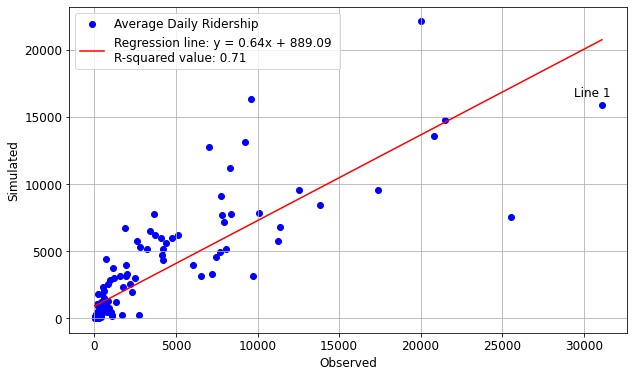

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



cleaned_pairs = [(x, y) for x, y in zip(obss2, sims2) if not np.isnan(x) and not x == 0]
cleaned_list1, cleaned_list2 = zip(*cleaned_pairs)

obsss = cleaned_list1
simss = cleaned_list2

# For demonstration purposes, let's create a dummy list of route names
# Compute the regression line
slope, intercept, r_value, _, _ = linregress(obsss, simss)
line = [slope*xi + intercept for xi in obsss]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(obsss, simss, color='blue', label='Average Daily Ridership')

# Add labels for specific routes
for x, y, route in zip(obsss, simss, route_names):
    if route in ['1', '1T']:
        plt.text(x+500, y+600, 'Line 1', fontsize=12, ha='right')

plt.plot(obsss, line, color='red', label=f'Regression line: y = {slope:.2f}x + {intercept:.2f} \nR-squared value: {r_value**2:.2f}')
plt.xlabel('Observed',fontsize=12)
plt.ylabel('Simulated',fontsize=12)
plt.legend(fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.savefig("AC_LinebyLine_Ridership.png", dpi=300)
plt.show()

In [36]:
filtered_df.DATE.value_counts()

2020-02-05    3865
2020-02-18    3810
2020-02-06    3770
2020-02-04    3756
2020-02-19    3683
2020-02-25    3676
2020-02-12    3643
2020-02-11    3629
2020-02-26    3622
2020-02-03    3563
2020-02-24    3561
2020-02-10    3534
2020-02-27    3528
2020-02-07    3500
2020-02-20    3474
2020-02-13    3471
2020-02-28    3421
2020-02-21    3345
2020-02-14    3031
Name: DATE, dtype: int64